In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [56]:
from tvb.simulator.lab import *
import h5py
import os
import matplotlib.pyplot as plt

import scipy 
import scipy.fftpack
import seaborn as sns

import scipy 
import scipy.fftpack
from scipy.fft import fft, ifft
from scipy import signal
from scipy.integrate import simps

In [3]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Wilson Cowan/DATA")

In [4]:
#import connectivity file to know which region corresponds to which index in the matrices
filename = "Connectivity.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    regions_list = list(f['region_labels'])

regions = np.array(regions_list)

Keys: <KeysViewHDF5 ['areas', 'centres', 'cortical', 'hemispheres', 'orientations', 'region_labels', 'tract_lengths', 'weights']>


In [74]:
os.chdir("C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs")
#import timeseries
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs"

filename = mydir + "/Depr_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    depr_left = f["data"]
    depr_left= np.array(depr_left)
    
filename = mydir + "/Depr_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    depr_right = f["data"]
    depr_right = np.array(depr_right)

    
file_name = mydir + "/TimeSeries_Depr.h5"
with h5py.File(filename, "r") as f:
    depr_TS = f["data"]
    depr_TS= np.array(depr_TS)
    
filename = mydir + "/Time_Depr.h5"
with h5py.File(filename, "r") as f:
    deprtime = f["time"]
    deprtime = np.array(deprtime)

In [7]:
#import timeseries healthy
mydir = "C:/Users/celie/OneDrive - ugentbe/NOG NODIG/2de master/Masterproef/Datasets/All_freqs/10subs"

filename = mydir + "/Health_leftDLPFC.h5"
with h5py.File(filename, "r") as f:
    health_left = f["data"]
    health_left= np.array(health_left)
    
filename = mydir + "/Health_rightDLPFC.h5"
with h5py.File(filename, "r") as f:
    health_right = f["data"]
    health_right = np.array(health_right)

    
file_name = mydir + "/TimeSeries_Health.h5"
with h5py.File(filename, "r") as f:
    health_TS = f["data"]
    health_TS= np.array(health_TS)
    
filename = mydir + "/Time_Health.h5"
with h5py.File(filename, "r") as f:
    healthtime = f["time"]
    healthtime = np.array(healthtime)

In [47]:
#calculate average across each timepoint 

#av_health = health_TS.mean(axis = 1) 
av_depr = depr_TS.mean(axis = 1) 
av_left_depr = depr_left.mean(axis = 1) 
av_right_depr = depr_right.mean(axis = 1) 

av_health = health_TS.mean(axis = 1) 
av_left_health = health_left.mean(axis = 1) 
av_right_health = health_right.mean(axis = 1) 

In [84]:
#delete first 500ms
todelete = (len(av_depr)/2500)*500 #calculate how many measurments per ms, than multiply with 500 to delete first 500ms
print(todelete)
list_deleterows = [*range(0,int(todelete),1)]

av_depr = np.delete(av_depr, list_deleterows, 0)
av_left_depr = np.delete(av_left_depr, list_deleterows, 0)
av_right_depr= np.delete(av_right_depr, list_deleterows, 0)

av_health = np.delete(av_health, list_deleterows, 0)
av_left_health = np.delete(av_left_health, list_deleterows, 0)
av_right_health= np.delete(av_right_health, list_deleterows, 0)

25408.0


In [83]:
#check shapes
print(shape(depr_left))
print(shape(depr_right))
print(shape(depr_TS))
print(size(deprtime))
print(shape(av_depr))

(204800, 3)
(204800, 3)
(204800, 3)
158800
(127040,)


In [41]:
#original amount of data points (before removing first rows)/2.5s = sample rate
sf = len(depr_TS)/2.5
print(samplerate)

81920.0


C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 327680 is greater than input length  = 158800, using nperseg = 158800
  .format(nperseg, input_length))


<IPython.core.display.Javascript object>


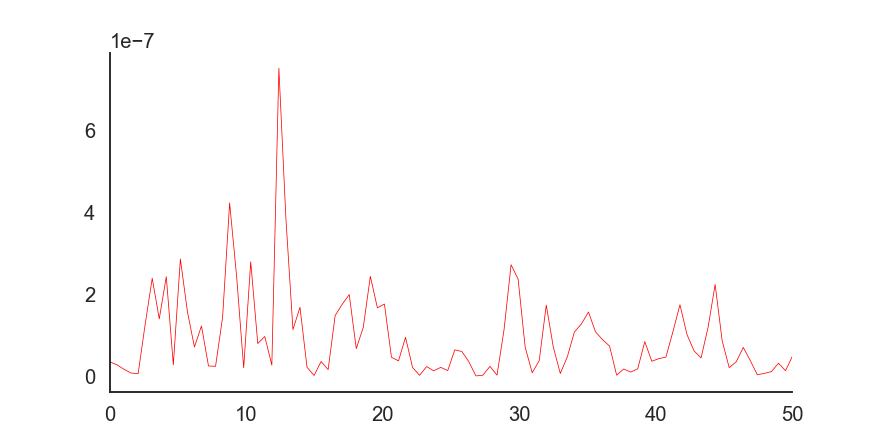

In [50]:
#plot PSD - overall Regrions
win = 4 * sf

freqs_depr, psd_depr     = signal.welch(av_depr, sf, nperseg=win)
freqs_health, psd_health     = signal.welch(av_health, sf, nperseg=win)

sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs_depr, psd_depr, color='red', lw=0.5)
plt.plot(freqs__health, psd_health, color='green', lw=0.5)
plt.xlim([0, 50])
sns.despine()

In [88]:
#store alpha power from each mean brain + alpha asymmetry 
win = 4 * sf


#calculations for depressed brain 
freqs_depr, psd_depr               = signal.welch(av_depr, sf, nperseg=win)
freqs_depr_left, psd_depr_left     = signal.welch(av_left_depr, sf, nperseg=win)
freqs_depr_right, psd_depr_right   = signal.welch(av_right_depr, sf, nperseg=win)

freq_res_depr = freqs_depr[1] - freqs_depr[0]
freq_res_depr_left = freqs_depr_left[1] - freqs_depr_left[0]
freq_res_depr_right = freqs_depr_right[1] - freqs_depr_right[0]

total_power_depr = simps(psd_depr, dx=freq_res_depr)
total_power_depr_left = simps(psd_depr_left, dx=freq_res_depr_left)
total_power_depr_right = simps(psd_depr_right, dx=freq_res_depr_right)

low, high = 8, 12

idx_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
idx_depr_left = np.logical_and(freqs_depr_left >= low, freqs_depr_left <= high)
idx_depr_right = np.logical_and(freqs_depr_right >= low, freqs_depr_right <= high)

power_depr = simps(psd_depr[idx_depr], dx=freq_res_depr)
power_depr_left = simps(psd_depr_left[idx_depr_left], dx=freq_res_depr_left)
power_depr_right = simps(psd_depr_right[idx_depr_right], dx=freq_res_depr_right)

#calculations for healthy brain 
freqs_health, psd_health               = signal.welch(av_health, sf, nperseg=win)
freqs_health_left, psd_health_left     = signal.welch(av_left_health, sf, nperseg=win)
freqs_health_right, psd_health_right   = signal.welch(av_right_health, sf, nperseg=win)

freq_res_health = freqs_health[1] - freqs_health[0]
freq_res_health_left = freqs_health_left[1] - freqs_health_left[0]
freq_res_health_right = freqs_health_right[1] - freqs_health_right[0]

total_power_health = simps(psd_health, dx=freq_res_health)
total_power_health_left = simps(psd_health_left, dx=freq_res_health_left)
total_power_health_right = simps(psd_health_right, dx=freq_res_health_right)

low, high = 8, 12

idx_health = np.logical_and(freqs_health >= low, freqs_health <= high)
idx_health_left = np.logical_and(freqs_health_left >= low, freqs_health_left <= high)
idx_health_right = np.logical_and(freqs_health_right >= low, freqs_health_right <= high)

power_health = simps(psd_health[idx_health], dx=freq_res_health)
power_health_left = simps(psd_health_left[idx_health_left], dx=freq_res_health_left)
power_health_right = simps(psd_health_right[idx_health_right], dx=freq_res_health_right)


#create empty textfile
f= open("Power_bands_depr.txt","w+")
g= open("Power_bands_health.txt","w+")


with open ("Power_bands_depr.txt", "a") as file: 
            
    file.write('Absolute overall entire alpha band: %.5f uV^2' % power_depr + "\n")
    file.write('Absolute left entire alpha band: %.5f uV^2' % power_depr_left + "\n")
    file.write('Absolute right entire alpha band: %.5f uV^2' % power_depr_right + "\n")

    relativepower = power_depr/total_power_depr
    file.write('Relative overall alpha band: : %.5f uV^2' % relativepower + "\n")
    relativepower_left = power_depr_left/total_power_depr_left
    file.write('Relative left alpha band: : %.5f uV^2' % relativepower_left + "\n")
    relativepower_right = power_depr_right/total_power_depr_right
    file.write('Relative right alpha band: : %.5f uV^2' % relativepower_right + "\n")
    
    depr_left_right = power_depr_left/power_depr_right
    file.write('Relative left-right alpha alpha band: : %.5f uV^2' % depr_left_right + "\n")

with open ("Power_bands_health.txt", "a") as file: 
            
    file.write('Absolute overall entire alpha band: %.5f uV^2' % power_health + "\n")
    file.write('Absolute left entire alpha band: %.5f uV^2' % power_health_left + "\n")
    file.write('Absolute right entire alpha band: %.5f uV^2' % power_health_right + "\n")

    relativepower = power_health/total_power_health
    file.write('Relative overall alpha band: : %.5f uV^2' % relativepower + "\n")
    relativepower_left = power_health_left/total_power_health_left
    file.write('Relative left alpha band: : %.5f uV^2' % relativepower_left + "\n")
    relativepower_right = power_health_right/total_power_health_right
    file.write('Relative right alpha band: : %.5f uV^2' % relativepower_right + "\n")

#overall Regrions
for i in range(4):
    low, high = 8+i, 9+i
    
    #depressed brain
    idx_depr = np.logical_and(freqs_depr >= low, freqs_depr <= high)
    idx_depr_left = np.logical_and(freqs_depr_left >= low, freqs_depr_left <= high)
    idx_depr_right = np.logical_and(freqs_depr_right >= low, freqs_depr_right <= high)
    
    power_depr = simps(psd_depr[idx_depr], dx=freq_res_depr)
    power_depr_left = simps(psd_depr_left[idx_depr_left], dx=freq_res_depr_left)
    power_depr_right = simps(psd_depr_right[idx_depr_right], dx=freq_res_depr_right)
    
    #healthy brain
    idx_health = np.logical_and(freqs_health >= low, freqs_health <= high)
    idx_health_left = np.logical_and(freqs_health_left >= low, freqs_health_left <= high)
    idx_health_right = np.logical_and(freqs_health_right >= low, freqs_health_right <= high)
    
    power_health = simps(psd_health[idx_health], dx=freq_res_health)
    power_health_left = simps(psd_health_left[idx_health_left], dx=freq_res_health_left)
    power_health_right = simps(psd_health_right[idx_health_right], dx=freq_res_health_right)
    
    
    if i ==0:
        band = 'lowest'
    elif i == 1:
        band = 'low'
    elif i == 2:
        band = 'middle'
    elif i == 3:
        band = 'high'
    else:
        band = 'highest'
    
    with open ("Power_bands_depr.txt", "a") as file: 
            
            file.write("Absolute overall " + str(band) +  ' alpha band: %.5f uV^2' % power_depr + "\n")
            file.write("Absolute left " + str(band) +  ' alpha band: %.5f uV^2' % power_depr_left + "\n")
            file.write("Absolute right " + str(band) +  ' alpha band: %.5f uV^2' % power_depr_right + "\n")
            
            relativepower = power_depr/total_power_depr
            file.write("Relative overall " + str(band) +  'alpha band: : %.5f uV^2' % relativepower + "\n")
            relativepower_left = power_depr_left/total_power_depr_left
            file.write("Relative left " + str(band) +  'alpha band: : %.5f uV^2' % relativepower_left + "\n")
            relativepower_right = power_depr_right/total_power_depr_right
            file.write("Relative right " + str(band) +  'alpha band: : %.5f uV^2' % relativepower_right + "\n")
    
            depr_left_right = power_depr_left/power_depr_right
            file.write("Relative left-right alpha " + str(band) +  'alpha band: : %.5f uV^2' % depr_left_right + "\n")

    with open ("Power_bands_health.txt", "a") as file: 
            
            file.write("Absolute overall " + str(band) +  ' alpha band: %.5f uV^2' % power_health + "\n")
            file.write("Absolute left " + str(band) +  ' alpha band: %.5f uV^2' % power_health_left + "\n")
            file.write("Absolute right " + str(band) +  ' alpha band: %.5f uV^2' % power_health_right + "\n")
            
            relativepower = power_health/total_power_health
            file.write("Relative overall " + str(band) +  'alpha band: : %.5f uV^2' % relativepower + "\n")
            relativepower_left = power_health_left/total_power_health_left
            file.write("Relative left " + str(band) +  'alpha band: : %.5f uV^2' % relativepower_left + "\n")
            relativepower_right = power_health_right/total_power_health_right
            file.write("Relative right " + str(band) +  'alpha band: : %.5f uV^2' % relativepower_right + "\n")
    
            depr_left_right = power_health_left/power_health_right
            file.write("Relative left-right alpha " + str(band) +  'alpha band: : %.5f uV^2' % depr_left_right + "\n")


C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 327680 is greater than input length  = 101632, using nperseg = 101632
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 327680 is greater than input length  = 101632, using nperseg = 101632
  .format(nperseg, input_length))
C:\Users\celie\OneDrive\Documenten\TVB_Windows_2.2\TVB_Distribution\tvb_data\Lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 327680 is greater than input length  = 101632, using nperseg = 101632
  .format(nperseg, input_length))


NameError: name 'av_health' is not defined

In [86]:
Storage = numpy.zeros(shape=(36,4))

In [87]:
Storage

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])